<a href="https://colab.research.google.com/github/adonisdario/data-science/blob/main/Analise_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Sala 1/Analise Credito/Case_Data.csv')

In [ ]:
df.head(3)

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,INDIVIDUAL,NaN,NaN,0,0,52303,41000,NaN,1.0,0.0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,INDIVIDUAL,NaN,NaN,0,332,175731,13100,NaN,1.0,0.0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,INDIVIDUAL,NaN,NaN,0,0,202012,16300,NaN,1.0,0.0


Remoção de colunas não importantes

In [ ]:
cols = ['Row ID', 'id', 'funded_amnt', 'purpose', 'next_pymnt_d', 'collections_12_mths_ex_med', 'Unnamed: 50', '36months', '60months']
df.drop(columns=cols, inplace=True)

Limpeza e organização dos dados

In [ ]:
df['emp_length'].fillna('0', inplace=True)
df['term'] = df['term'].apply(lambda x: x.replace('months', ''))
df['term'] = df['term'].astype(int)
df['emp_length'] = df['emp_length'].apply(lambda x: x.replace('years', '').replace('< ','<').replace('year', '').strip())
df['mths_since_last_delinq'].fillna(0, inplace=True)
# df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0.0, inplace=True)
# df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(0.0, inplace=True)
# df['mths_since_last_delinq'] = df['mths_since_last_delinq'].apply(lambda x: int(x))
# df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].apply(lambda x: int(x))

##**Análise de Crédito - Apresentação dos Dados**

**Data Dictionary**

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| member_id | ID do Solicitante do Empréstimo		|  		                                 |
| load_amnt   | Valor concedido do Empréstimo           | 			                         |
| term      | Meses para pagamento                      |  meses: 36 ou 60                               |
| int_rate      | Taxa de juros                         |                                                |
| installment    | Valor que o cliente deve por atrasos | 		                                 |
| grade    | Classe do cliente				|                                                |
| sub_grade   | Subclasse do cliente                    |                                                |
| emp_title     | O cargo ocupado pelo cliente          |                                                |
| emp_length    | O tempo em que o cliente está empregado |                                               |
| home_ownership | Se o cliente possui casas registradas | MORTGAGE = Hipotecada, RENT = Alugada, OWN = Própria |
| anual_inc | Renda anual do cliente                    |  		                                 |
| verification_status   | Indica se a renda informada foi verificada | Source Verified = Verificada na Fonte, Verified = Verificada, Not Verified = Não verificada |
| issue_d      | O mês que o empréstimo foi solicitado  |                                                |
| loan_status     | Status do empréstimo                | Current = Corrente, Charged Off = Descartado 	 |
| title    | Finalidade do empréstimo			|                                                |
| dti    | A razão dívida / rendimento 			|                                                |
|	 | (O quanto o mutuário deve todos os meses pelo rendimento do mutuário todos os meses) |        |
| delinq_2yrs   | Nº de parcelas atrasadas nos últimos 2 anos |                                          |   
| early_cr_line   | O mês/ano em que a linha de crédito foi aberta |                                     |  
| inq_last_6mths    | Consultas sobre empréstimos feitos nos últimos 6 meses  |                          |
| mths_since_last_delinq | Meses com atraso das parcelas | 						 |
| open_acc | Nº de linhas de crédito abertas             | 		                                 |
| pub_rec   | Número de registros públicos depreciativos | 				                 |
| revol_bal | Saldo rotativo de crédito total            |                                               |
| revol_util | Taxa de utilização da linha rotativa      |                                               |
| total_acc    | Nº total de linhas de crédito do cliente |                                              |
| inicial_list_status | O status de listagem inicial do empréstimo | W = inteiro, F = fracionário        |
| out_prncp   | Principal pendente restante para o valor total financiado |                              |   
| total_pymnt     | Pagamentos recebidos pelo valor total financiado. |                                  |
| total_rec_prncp | Valor recebido		        |                                                |   
| total_rec_int | Juros recebidos até o momento         | 						 |
| total_rec_late_fee | Taxas atrasadas recebidas 	| 			                         |  
| recoveries | Total de procedimentos de recuperação iniciados contra o mutuário | 			 |
| collection_recovery_fee | As taxas cobradas durante os procedimentos de recuperação |                  |
| last_pymnt_d | O último mês em que o pagamento foi recebido |                                          |
|	      | (Meses desde a inadimplência de 90 dias mais recente ou classificação pior)		 |
| last_pymnt_amnt | O último valor do pagamento recebido |                                               |
| next_pymnt_d | Próxima data de pagamento agendada	|                                                |
| last_credit_pull_d | O mês mais recente que LC retirou crédito para este empréstimo |                  |  
| mths_since_last_major_derog | Meses desde a inadimplência de 90 dias |                                 |  
| application_type | Indica o tipo do pedido		| INDIVIDUAL = Individual, JOINT = Conjunto      |   
| anual_inc_joint | A renda anual combinada fornecida por co-mutuários | 				 |    
| dti_joint | Índice do total de pagamentos mensais dos co-mutuários sobre o total das obrigações da dívida  |
|	    | (Excluindo hipotecas e o empréstimo em ML solicitado, dividido pela renda mensal combinada declarada pelos co-mutuários) |
| acc_now_delinq | O número de contas nas quais o mutuário está inadimplente | 				 |
| tot_coll_amt | Valores totais de cobrança já devidos pelo mutuário | 				 	 |
| tot_cur_bal | Saldo atual total de todas as contas do mutuário | 					 |
| total_rev_hi_lim | Total de crédito alto/limite de crédito | 						 |

In [ ]:
df_limpo = df.copy(deep=True)
df_limpo.head()

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,64537751,20000,36,12.29,667.06,C,C1,Accounting Clerk,1,OWN,...,0.00,16-Jan,NaN,INDIVIDUAL,NaN,NaN,0,0,52303,41000
1,64163931,11000,36,12.69,369.00,C,C2,Accounts Payable Lead,7,MORTGAGE,...,10059.00,16-Jan,79.0,INDIVIDUAL,NaN,NaN,0,332,175731,13100
2,64333218,7000,36,9.99,225.84,B,B3,Nurse,6,MORTGAGE,...,225.84,16-Jan,NaN,INDIVIDUAL,NaN,NaN,0,0,202012,16300
3,63900496,10000,36,10.99,327.34,B,B4,Service Manager,10+,MORTGAGE,...,327.34,16-Jan,NaN,INDIVIDUAL,NaN,NaN,0,0,108235,34750
4,62544456,9550,36,19.99,354.87,E,E4,NaN,0,RENT,...,354.87,16-Jan,69.0,INDIVIDUAL,NaN,NaN,0,0,45492,14100


In [ ]:
df4 = df_limpo.iloc[:5, 1:21]
df4

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc
0,20000,36,12.29,667.06,C,C1,Accounting Clerk,1,OWN,65000.0,Source Verified,15-Sep,Charged Off,Debt consolidation,20.72,0,Sep-00,1,0.0,25
1,11000,36,12.69,369.00,C,C2,Accounts Payable Lead,7,MORTGAGE,40000.0,Source Verified,15-Sep,Charged Off,Debt consolidation,24.57,0,2-Sep,0,36.0,13
2,7000,36,9.99,225.84,B,B3,Nurse,6,MORTGAGE,32000.0,Source Verified,15-Sep,Charged Off,Debt consolidation,32.41,0,6-Feb,1,0.0,18
3,10000,36,10.99,327.34,B,B4,Service Manager,10+,MORTGAGE,48000.0,Source Verified,15-Sep,Charged Off,Credit card refinancing,30.98,0,Oct-99,2,0.0,18
4,9550,36,19.99,354.87,E,E4,NaN,0,RENT,32376.0,Verified,15-Sep,Charged Off,Debt consolidation,32.54,0,Nov-99,3,69.0,9


In [ ]:
renda_media = (pd.crosstab(df_limpo['title'], df_limpo['grade'], aggfunc = 'mean', values = df_limpo['annual_inc'])).round(2)
renda_media

grade,A,B,C,D,E,F,G
title,,,,,,,
Business,188427.03,107374.86,98145.11,84446.37,86080.49,94278.87,73728.83
Car financing,88943.77,69281.34,63666.34,60117.90,63310.17,63506.21,44714.29
Credit card refinancing,91309.17,77913.01,72454.12,65561.81,66520.65,69326.59,51864.37
Debt consolidation,91246.18,79242.27,73210.71,68735.06,70854.08,69882.23,67807.95
Green loan,57000.00,85295.20,69852.63,60026.55,77800.00,69171.43,85000.00
Home buying,90974.06,94134.93,80714.29,80471.39,77660.85,74030.45,94849.84
Home improvement,107980.00,92746.42,87098.91,82718.83,86589.48,82029.18,81137.96
Major purchase,87784.36,81416.57,73946.95,77849.71,82467.37,74120.73,55147.94
Medical expenses,88989.39,78086.68,68766.79,62626.21,68206.35,69804.13,61945.27


In [ ]:
renda_media = (pd.crosstab(df_limpo['title'], df_limpo['grade'], aggfunc = 'mean', values = df_limpo['annual_inc'])).round(2)
renda_media
import plotly.express as px
fig = px.imshow(renda_media)
fig.show()

In [ ]:
import plotly.express as px

In [ ]:
dftemp = df_limpo.iloc[:100000, 1:7]
dftemp

,loan_amnt,term,int_rate,installment,grade,sub_grade
0,20000,36,12.29,667.06,C,C1
1,11000,36,12.69,369.00,C,C2
2,7000,36,9.99,225.84,B,B3
3,10000,36,10.99,327.34,B,B4
4,9550,36,19.99,354.87,E,E4
...,...,...,...,...,...,...
99995,12000,60,7.89,242.69,A,A5
99996,24000,36,12.29,800.48,C,C1
99997,10600,36,13.33,358.85,C,C3
99998,11225,36,14.65,387.20,C,C5


In [ ]:
dft = df_limpo.iloc[:5, 21:41]
dft

,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq
0,0,31578,77.0,42,w,0.0,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,16-Jan,NaN,INDIVIDUAL,NaN,NaN,0
1,1,5084,38.8,41,w,0.0,10043.49,9942.67,100.81,0.0,0.0,0.0,15-Oct,10059.00,16-Jan,79.0,INDIVIDUAL,NaN,NaN,0
2,0,12070,74.0,36,f,0.0,221.96,167.56,54.40,0.0,0.0,0.0,15-Oct,225.84,16-Jan,NaN,INDIVIDUAL,NaN,NaN,0
3,0,22950,66.0,41,f,0.0,315.13,235.76,79.37,0.0,0.0,0.0,15-Oct,327.34,16-Jan,NaN,INDIVIDUAL,NaN,NaN,0
4,0,4172,29.6,26,w,0.0,333.66,195.78,137.88,0.0,0.0,0.0,15-Oct,354.87,16-Jan,69.0,INDIVIDUAL,NaN,NaN,0


In [ ]:
dft = df_limpo.iloc[:5, 41:]
dft

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,52303,41000
1,332,175731,13100
2,0,202012,16300
3,0,108235,34750
4,0,45492,14100


## Calculando o Valor Esperado ou Esperança Matemática

O Valor Esperado que será calculado é em relação ao número de contas abertas 'open_acc'

In [ ]:
freq = df_limpo['open_acc'].value_counts()
pct = (df_limpo['open_acc'].value_counts(normalize = True) * 100).round(2)
df_val_esp = pd.DataFrame({'Freq': freq, 'Prob %': pct}).reset_index()
df_val_esp['V_Esp'] = df_val_esp['open_acc'] * df_val_esp['Prob %']
df_val_esp = df_val_esp.sort_values('open_acc')
df_val_esp

,open_acc,Freq,Prob %,V_Esp
38,1,50,0.02,0.02
27,2,514,0.24,0.48
19,3,2166,1.02,3.06
14,4,5450,2.56,10.24
10,5,9264,4.35,21.75
...,...,...,...,...
58,66,1,0.00,0.00
55,67,1,0.00,0.00
59,68,1,0.00,0.00
61,70,1,0.00,0.00


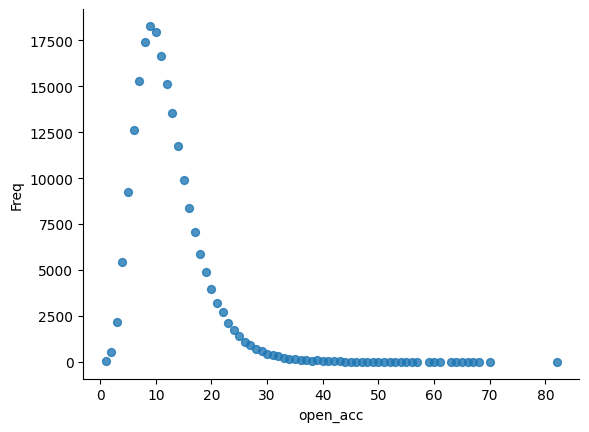

In [ ]:
# @title open_acc vs Freq

from matplotlib import pyplot as plt
df_val_esp.plot(kind='scatter', x='open_acc', y='Freq', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

O valor esperado E(x) = x1 * p(x1) + ... + xn * p(xn), onde x = Nº de contas abertas e p(x) = Probababilidade de ter usuários com a respectiva quantidade de contas abertas

In [ ]:
Ex = df_val_esp['V_Esp'].sum().round(2)
print(f'O Valor Esperado E(x) = {Ex}')

O Valor Esperado E(x) = 1195.67


In [ ]:
data = df_limpo.groupby("open_acc")['installment'].mean()
df_scat = pd.DataFrame(data=data).reset_index()
df_scat

,open_acc,installment
0,1,428.380800
1,2,344.183054
2,3,336.687479
3,4,345.132828
4,5,362.745894
...,...,...
63,66,523.750000
64,67,688.230000
65,68,954.910000
66,70,327.340000


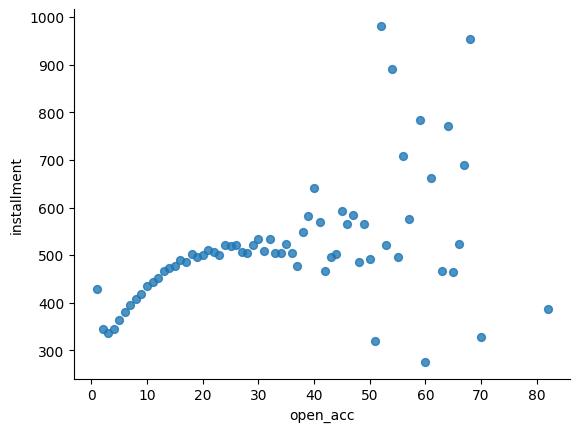

In [ ]:
df_scat.plot(kind='scatter', x='open_acc', y='installment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Renda Anual'}, xlabel='Renda', ylabel='grade'>

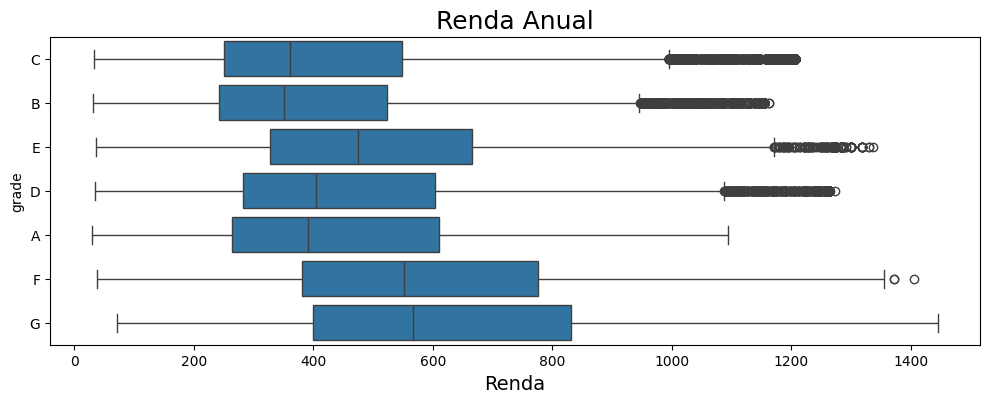

In [ ]:
import seaborn as sns
ax = sns.boxplot(x = 'installment', y = 'grade', data = df_limpo, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda Anual', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

In [ ]:
df_limpo['acc_now_delinq'].value_counts()

acc_now_delinq
0    211858
1      1076
2        57
3         5
4         2
5         1
Name: count, dtype: int64

## Valores Categóricos - Nominais

Vamos transformar a variável categórica 'home_ownership' em variáveis indicativas

In [ ]:
df2 = pd.get_dummies(df_limpo['home_ownership'], drop_first=True)
df2.head()

,MORTGAGE,OWN,RENT
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


Qual a probabilidade do solicitante do empréstimo ter casa própria?

- Mortgage = Financiado
- Rent = Alugado
- Own = Casa própria
- Any = Outros

In [ ]:
casa_propria = len(df_limpo[df_limpo['home_ownership'] == 'OWN'])
probabilidade_casa_propria = casa_propria/len(df_limpo)
probabilidade_casa_propria

print(f'A probabilidade do solicitante ter casa própria é de {round(probabilidade_casa_propria*100,2)}%')

A probabilidade do solicitante ter casa própria é de 11.05%


## Distribuição Geométrica

Qual a probailidade de recuperarmos 3 clientes com nenhuma parcela atrasada?

In [ ]:
freq = df_limpo['mths_since_last_delinq'].value_counts()
pct = (df_limpo['mths_since_last_delinq'].value_counts(normalize = True)).round(2)
df_geom = pd.DataFrame({'Freq': freq, 'Prob': pct}).reset_index()
df3 = df_geom[df_geom['mths_since_last_delinq'] == 0]
df3


,mths_since_last_delinq,Freq,Prob
0,0.0,103603,0.49


In [ ]:
val = df3.loc[0, 'Prob']
val = (val ** 3) * 100
val

11.764899999999999

In [ ]:

print(f'A probabilidade de recuperarmos 3 clientes com nenhuma parcela em atraso é de {round(val, 2)} %')

A probabilidade de recuperarmos 3 clientes com nenhuma parcela em atraso é de 11.76 %


## Distribuição Multinomial

Qual a probabilidade de recuperarmos 5 clientes e 4 deles tiverem seus empréstimos descartados (Charged Off)?

In [ ]:
freq = df_limpo['loan_status'].value_counts()
pct = (df_limpo['loan_status'].value_counts(normalize = True)).round(2)
df_mult = pd.DataFrame({'Freq': freq, 'Prob': pct}).reset_index()
df_mult

,loan_status,Freq,Prob
0,Current,210226,0.99
1,Charged Off,2773,0.01


P(C) = Probabilidade do empréstimo estar Corrente; P(D) = Prob. do empréstimo ter sido Descartado

In [ ]:
Pc = df_mult.loc[0]['Prob']
Pd = df_mult.loc[1]['Prob']
Pc, Pd

(0.99, 0.01)

In [ ]:
import math
fact = math.factorial(5)/(math.factorial(4) * math.factorial(1))
fact

5.0

In [ ]:
val = fact * (Pd ** 4) * (Pc ** 1) * 100
val


4.95e-06

In [ ]:
print(f'A Prob. de recuperarmos 5 registros de empréstimos, sendo 4 deles com status Descartado e apenas 1 Corrente é de\n {val} %')

A Prob. de recuperarmos 5 registros de empréstimos, sendo 4 deles com status Descartado e apenas 1 Corrente é de
 4.95e-06 %


## Distribuição Exponencial

Qual a probabilidade do intervalo entre dois clientes nota G seja de no mínimo de 1000 registros?

In [ ]:
df_exp = pd.DataFrame(data = df_limpo['grade'].value_counts(normalize = True)).reset_index()
df_exp

,grade,proportion
0,B,0.294166
1,C,0.287269
2,A,0.173109
3,D,0.141282
4,E,0.078404
5,F,0.021488
6,G,0.004282


A Prob. de se ter um cliente com nota G é de 0,42% => λ = 0,0042

t0 = 1000

P(t >= 1000) = e^(-λ * t0)

In [ ]:
val = df_exp[df_exp['grade'] == 'G']['proportion']
lamb = val.values[0]
lamb

0.0042817102427710925

In [ ]:
e = math.e
Pt = e ** (-lamb * 1000)
Pt

0.013819008006588545

In [ ]:
print(f'P(t >= 1000) = {round(Pt *100, 2)} %')

P(t >= 1000) = 1.38 %


questão 2

In [ ]:
mu = 180
dp = 25
x1 = 150
x2 = 178

In [ ]:
z1 = (x1 - mu)/dp
z1

-1.2

In [ ]:
z2 = (x2 - mu)/dp
z2

-0.08

## Qual a probabilidade de um inadimplente solicitar empréstimo para pagar o cartão de crédito?

In [ ]:
#df_inadimplentes = df_limpo[(df_limpo['acc_now_delinq'] > 1) & (df_limpo['title'] == 'Credit card refinancing')]
inadimplentes = len(df_limpo[df_limpo['acc_now_delinq'] > 0])
prob_inadimplentes = inadimplentes/len(df_limpo)
#df_limpo['title'].value_counts()

In [ ]:
df_limpo['application_type'].value_counts()

application_type
INDIVIDUAL    212558
JOINT            441
Name: count, dtype: int64

In [ ]:
#df_limpo.to_excel("dataset.xlsx", index=False)

In [ ]:
df_hist = pd.DataFrame(df_limpo['annual_inc'].value_counts()).reset_index()
df_hist = df_hist.loc[0:100]
df_hist

,annual_inc,count
0,60000.0,8402
1,50000.0,7312
2,65000.0,6487
3,70000.0,6042
4,75000.0,5782
...,...,...
96,97000.0,452
97,165000.0,448
98,106000.0,407
99,91000.0,394


(array([[  4.,  25.,  25.,  24.,  11.,   5.,   4.,   2.,   0.,   1.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   393. ,  25353.7,  50314.4,  75275.1, 100235.8, 125196.5,
        150157.2, 175117.9, 200078.6, 225039.3, 250000. ]),
 <a list of 2 BarContainer objects>)

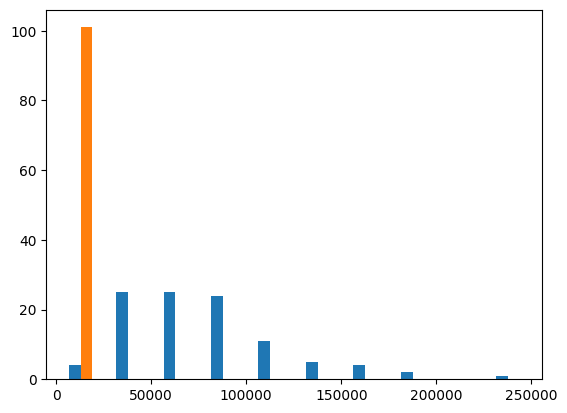

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_hist, rwidth=0.5)

<ipython-input-44-b609cba3b903>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




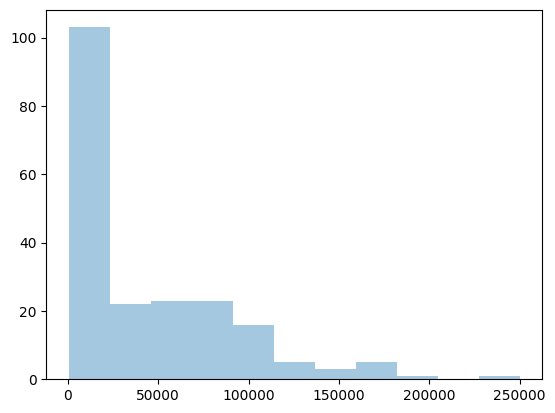

In [ ]:
import seaborn as sns
ax = sns.distplot(df_hist, kde = False)